Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Best parameters found:  {'colsample_bylevel': 0.6, 'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.8}
Train Mean Squared Error (MSE): 0.2743497417100411
Test Mean Squared Error (MSE): 0.3200077488969063
Train Root Mean Squared Error (RMSE): 0.5237840601908779
Test Root Mean Squared Error (RMSE): 0.5656922740297116
Train Mean Absolute Error (MAE): 0.3359621273745792
Test Mean Absolute Error (MAE): 0.3653410408192873
Train R^2 Score: 0.5851754367139963
Test R^2 Score: 0.4618411388383167


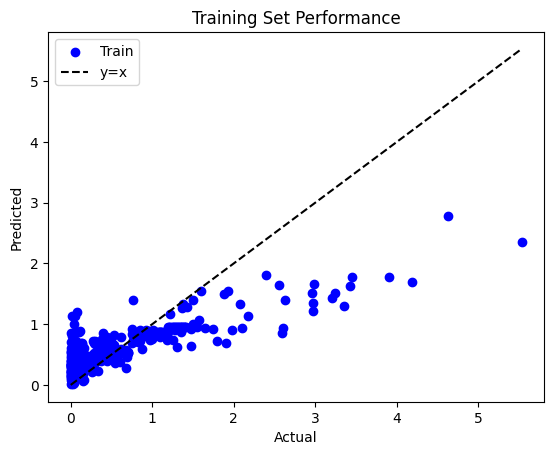

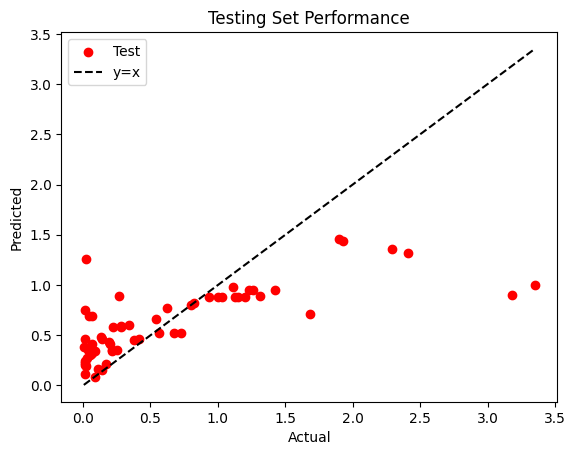

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib

# 读取CSV文件
data = pd.read_csv('C:\\Users\\sy\\Desktop\\data_rfe20c.csv')

# 数据预处理（根据实际情况进行调整）
X = data.drop(columns=['Target(uA)'])
y = data['Target(uA)']

# 数据归一化处理
scaler = MinMaxScaler()  
X_scaled = scaler.fit_transform(X)

# 将归一化后的数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=4)

# 设置参数范围
param_grid = {
    'n_estimators': [5,20],
    'max_depth': [1,2,3],
    'learning_rate': [0.05, 0.1],
    'subsample': [ 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'colsample_bytree': [0.8,0.7],
    'colsample_bylevel': [0.6, 0.7,0.8],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]
}
# 创建XGBoost模型
xgb_model = xgb.XGBRegressor()

# 使用网格搜索进行参数优化
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 计算训练集上的均方误差（MSE）
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train Mean Squared Error (MSE):", train_mse)

# 计算测试集上的均方误差（MSE）
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error (MSE):", test_mse)

# 计算训练集上的均方根误差（RMSE）
train_rmse = np.sqrt(train_mse)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

# 计算测试集上的均方根误差（RMSE）
test_rmse = np.sqrt(test_mse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)
# 计算训练集上的平均绝对误差（MAE）
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Train Mean Absolute Error (MAE):", train_mae)

# 计算测试集上的平均绝对误差（MAE）
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Test Mean Absolute Error (MAE):", test_mae)
# 计算训练集上的 R^2 分数
train_r2 = r2_score(y_train, y_train_pred)
print("Train R^2 Score:", train_r2)

# 计算测试集上的 R^2 分数
test_r2 = r2_score(y_test, y_test_pred)
print("Test R^2 Score:", test_r2)

# 保存模型为 .dat 文件
joblib.dump(best_model, 'xgboost_model.dat')

# 绘制训练集的预测图像
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set Performance")
plt.legend()
plt.show()

# 绘制测试集的预测图像
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Testing Set Performance")
plt.legend()
plt.show()



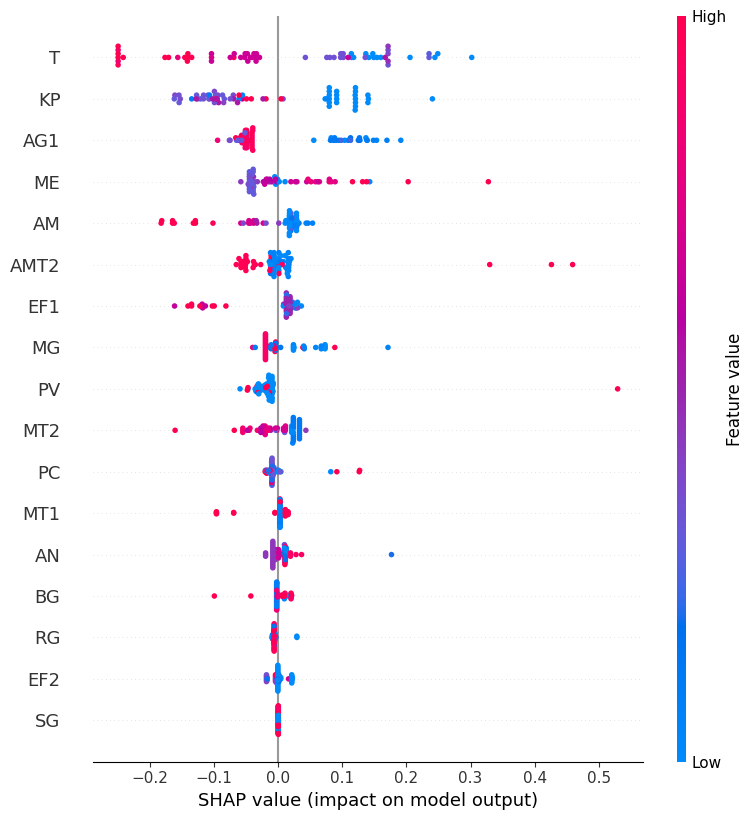

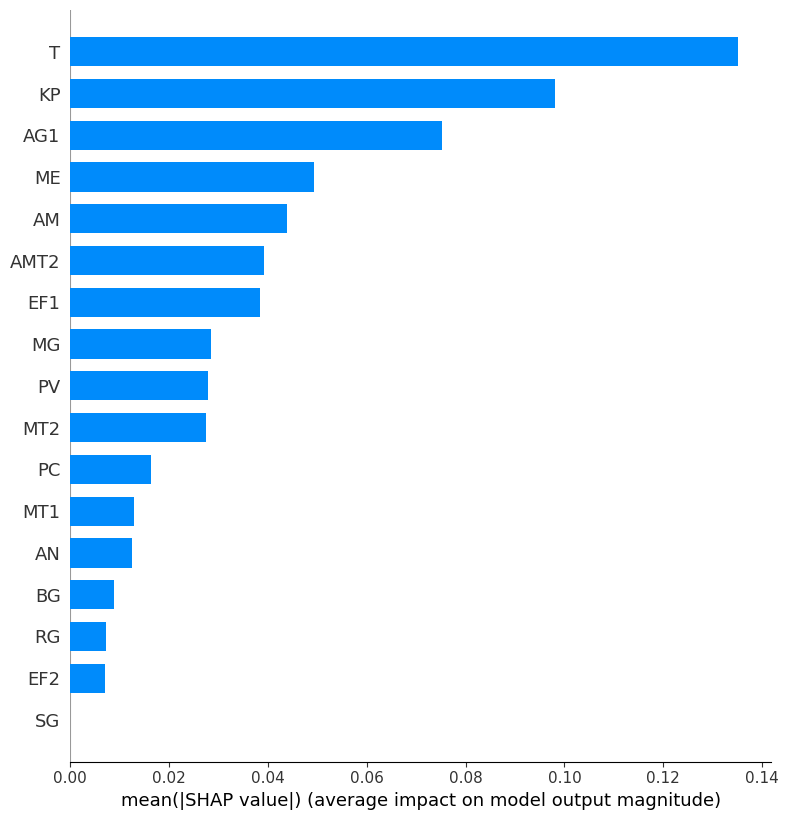

In [5]:
import shap
import joblib

# 加载保存的 XGBoost 模型
xgb_model = joblib.load('xgboost_model.dat')

# 初始化 SHAP 解释器
explainer = shap.Explainer(xgb_model)

# 计算 SHAP 值
shap_values = explainer.shap_values(X_test)

# 绘制 SHAP 汇总图
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# 绘制 SHAP 水平图
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Mean Squared Error (MSE): 1.401933701657461e-07
Test Mean Squared Error (MSE): 0.0284845886811875
Train Root Mean Squared Error (RMSE): 0.00037442405126506776
Test Root Mean Squared Error (RMSE): 0.16877377960212747
Train Mean Absolute Error (MAE): 3.1767955801105e-05
Test Mean Absolute Error (MAE): 0.08326584375000001
Train R^2 Score: 0.9999998022215237
Test R^2 Score: 0.9083982155688459


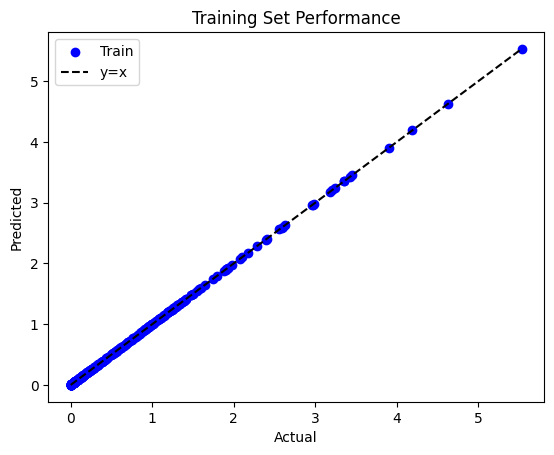

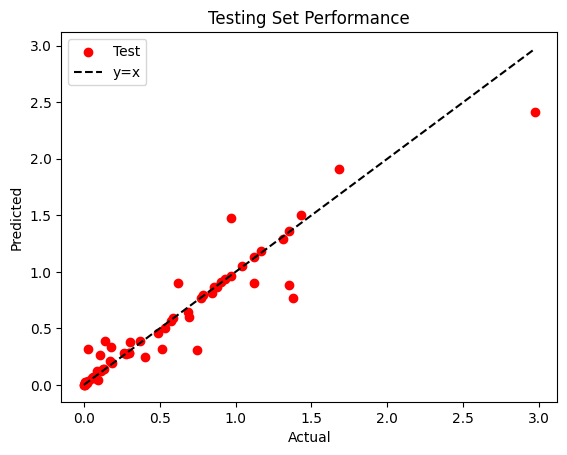

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib
# 读取CSV文件
data = pd.read_csv('C:\\Users\\sy\\Desktop\\data_rfe20c.csv')

# 数据预处理（根据实际情况进行调整）
X = data.drop(columns=['Target(uA)'])
y = data['Target(uA)']
# 数据归一化处理
scaler = MinMaxScaler()  
X_scaled = scaler.fit_transform(X)

# 将归一化后的数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=5)

# 设置参数范围
param_grid = [
    {'max_depth': [7,9,10,15,20],
     'min_samples_split': [2, 5, 7],
     'min_samples_leaf': [1, 2],
     'max_features': [None, 'sqrt', 'log2']
     }
]

# 创建决策树模型
tree_model = DecisionTreeRegressor()

# 使用网格搜索进行参数优化
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 计算训练集上的均方误差（MSE）
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train Mean Squared Error (MSE):", train_mse)

# 计算测试集上的均方误差（MSE）
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error (MSE):", test_mse)

# 计算训练集上的均方根误差（RMSE）
train_rmse = np.sqrt(train_mse)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

# 计算测试集上的均方根误差（RMSE）
test_rmse = np.sqrt(test_mse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)
# 计算训练集上的平均绝对误差（MAE）
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Train Mean Absolute Error (MAE):", train_mae)

# 计算测试集上的平均绝对误差（MAE）
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Test Mean Absolute Error (MAE):", test_mae)
# 计算训练集上的 R^2 分数
train_r2 = r2_score(y_train, y_train_pred)
print("Train R^2 Score:", train_r2)

# 计算测试集上的 R^2 分数
test_r2 = r2_score(y_test, y_test_pred)
print("Test R^2 Score:", test_r2)

# 保存模型
joblib.dump(best_model, 'decision_tree_model.dat')

# 绘制训练集的预测图像
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set Performance")
plt.legend()
plt.show()

# 绘制测试集的预测图像
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Testing Set Performance")
plt.legend()
plt.show()

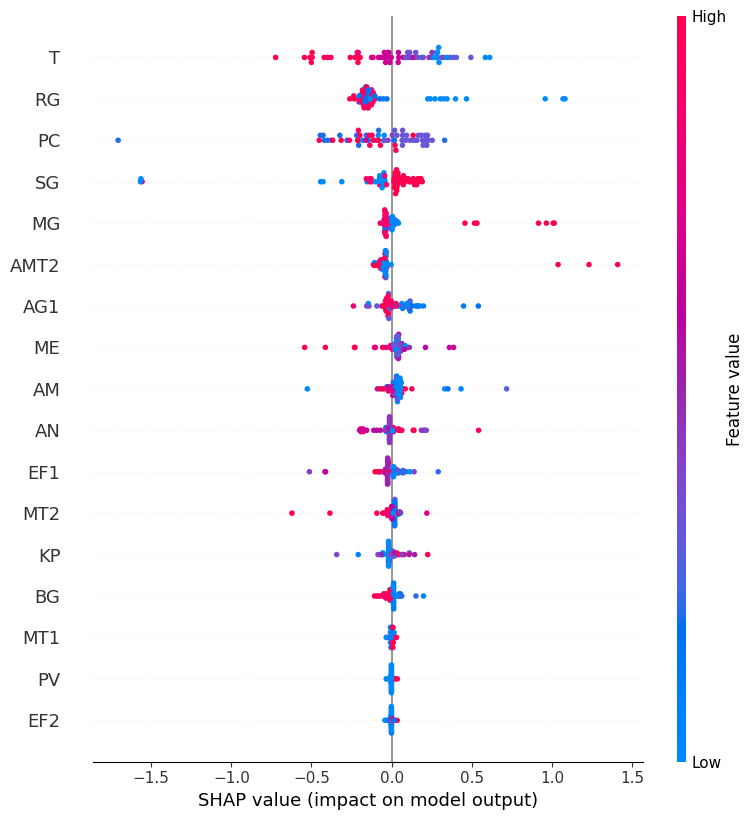

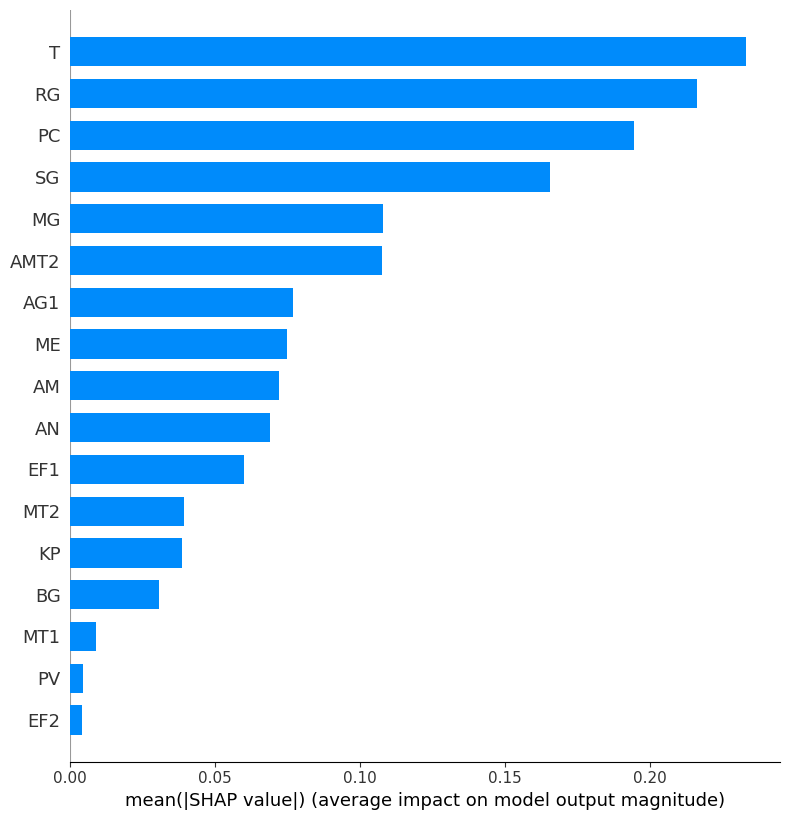

In [6]:
import shap
import joblib

# 加载保存的 XGBoost 模型
dt_model = joblib.load('decision_tree_model.dat')

# 初始化 SHAP 解释器
explainer = shap.Explainer(dt_model)

# 计算 SHAP 值
shap_values = explainer.shap_values(X_test)

# 绘制 SHAP 汇总图
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# 绘制 SHAP 水平图
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters found:  {'max_depth': 17, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Train Mean Squared Error (MSE): 9.013132576398176e-06
Test Mean Squared Error (MSE): 0.09697862618332112
Train Root Mean Squared Error (RMSE): 0.0030021879648679853
Test Root Mean Squared Error (RMSE): 0.3114139145627907
Train Mean Absolute Error (MAE): 0.0012455009024818348
Test Mean Absolute Error (MAE): 0.16103979487287262
Train R^2 Score: 0.9999858465575309
Test R^2 Score: 0.8645385147902295


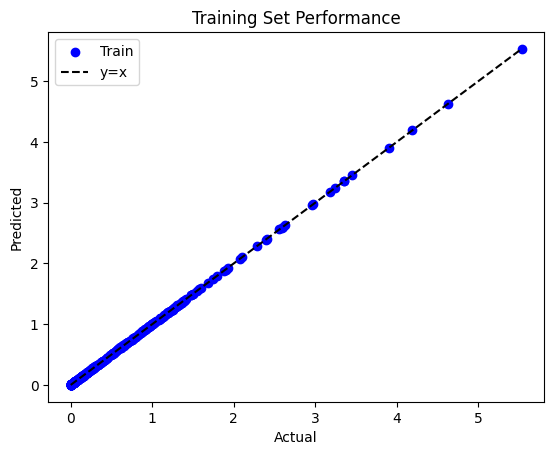

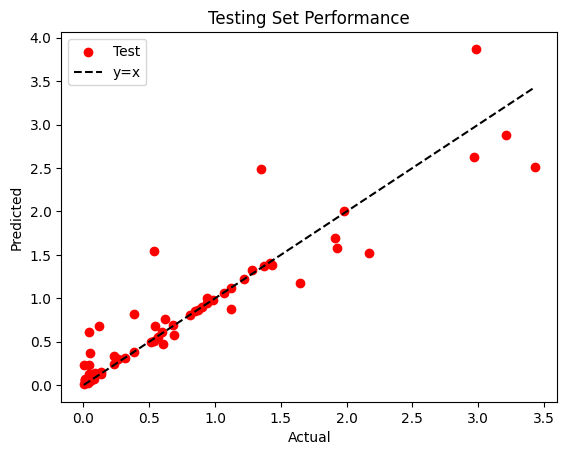

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib
# 读取CSV文件
data = pd.read_csv('C:\\Users\\sy\\Desktop\\data_rfe20c.csv')

# 数据预处理（根据实际情况进行调整）
X = data.drop(columns=['Target(uA)'])
y = data['Target(uA)']
# 数据归一化处理
scaler = MinMaxScaler()  
X_scaled = scaler.fit_transform(X)

# 将归一化后的数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=6)

# 设置参数范围
param_grid = [
    {'n_estimators': [35,50, 55,54],
     'max_depth': [ 12,14,16,17,18],
     'min_samples_split': [2, 3],
     'min_samples_leaf': [1, 2],
     'max_features': [None, 'sqrt', 'log2']}
]

# 创建Extra Trees模型
extra_trees_model = ExtraTreesRegressor()

# 使用网格搜索进行参数优化
grid_search = GridSearchCV(estimator=extra_trees_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 计算训练集上的均方误差（MSE）
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train Mean Squared Error (MSE):", train_mse)

# 计算测试集上的均方误差（MSE）
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error (MSE):", test_mse)

# 计算训练集上的均方根误差（RMSE）
train_rmse = np.sqrt(train_mse)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

# 计算测试集上的均方根误差（RMSE）
test_rmse = np.sqrt(test_mse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)
# 计算训练集上的平均绝对误差（MAE）
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Train Mean Absolute Error (MAE):", train_mae)

# 计算测试集上的平均绝对误差（MAE）
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Test Mean Absolute Error (MAE):", test_mae)

# 计算训练集上的 R^2 分数
train_r2 = r2_score(y_train, y_train_pred)
print("Train R^2 Score:", train_r2)

# 计算测试集上的 R^2 分数
test_r2 = r2_score(y_test, y_test_pred)
print("Test R^2 Score:", test_r2)

# 保存模型为 .dat 文件
joblib.dump(best_model, 'extra_trees_model.dat')

# 绘制训练集的预测图像
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set Performance")
plt.legend()
plt.show()

# 绘制测试集的预测图像
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Testing Set Performance")
plt.legend()
plt.show()


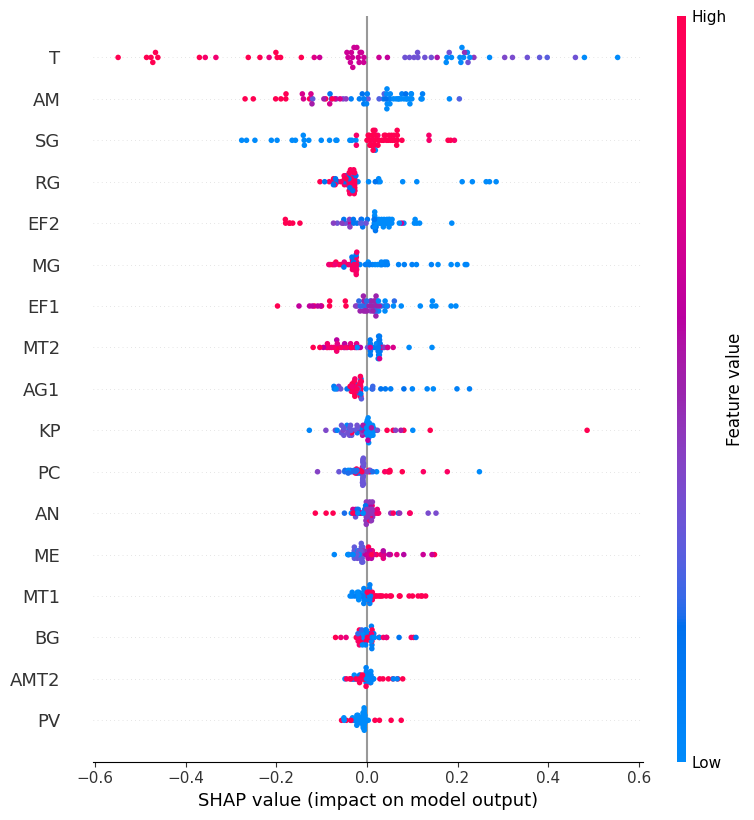

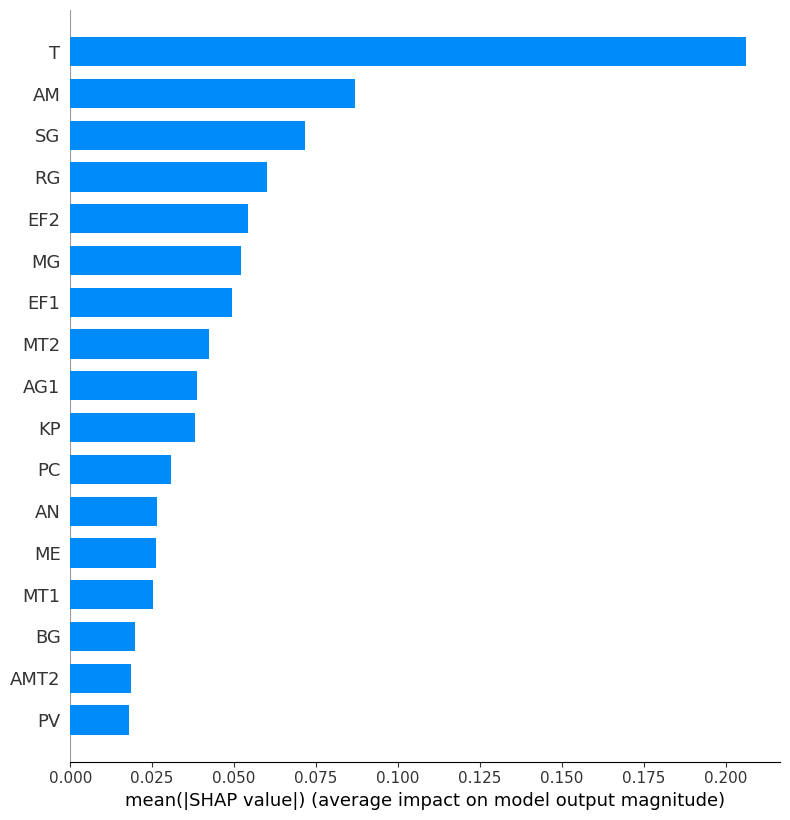

In [7]:
import shap
import joblib

# 加载保存的 XGBoost 模型
et_model = joblib.load('extra_trees_model.dat')

# 初始化 SHAP 解释器
explainer = shap.Explainer(et_model)

# 计算 SHAP 值
shap_values = explainer.shap_values(X_test)

# 绘制 SHAP 汇总图
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# 绘制 SHAP 水平图
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters found:  {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Train Mean Squared Error (MSE): 0.2343867761977894
Test Mean Squared Error (MSE): 0.4966063939221939
Train Root Mean Squared Error (RMSE): 0.48413508052793425
Test Root Mean Squared Error (RMSE): 0.7047030537199296
Train Mean Absolute Error (MAE): 0.2099301730985731
Test Mean Absolute Error (MAE): 0.35204780171653066
Train R^2 Score: 0.6445503343871082
Test R^2 Score: 0.19312334525361485


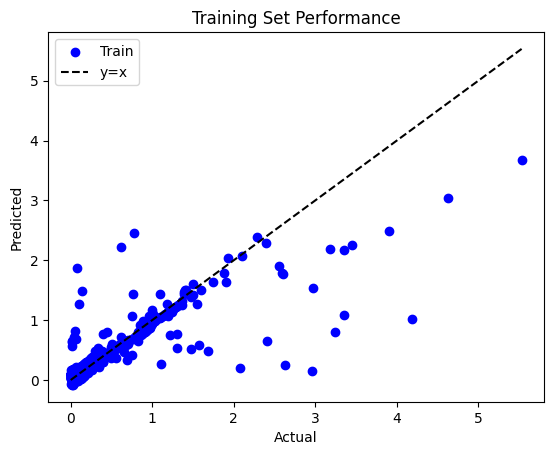

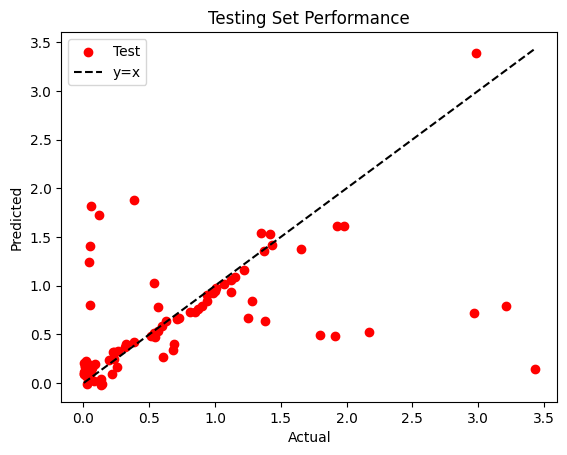

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib

# 读取CSV文件
data = pd.read_csv('C:\\Users\\sy\\Desktop\\data_rfe20c.csv')

# 数据预处理（根据实际情况进行调整）
X = data.drop(columns=['Target(uA)'])
y = data['Target(uA)']

# 数据归一化处理
scaler = MinMaxScaler()  
X_scaled = scaler.fit_transform(X)

# 将归一化后的数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=6)

# 设置参数范围
param_grid = [
    {'kernel': ['linear', 'rbf', 'poly'],
     'C': [0.1,0.2, 1, 10,20],
     'gamma': ['scale', 'auto'],
     'epsilon': [0.02,0.1, 0.2, 0.3,0.35,0.4]}
]

# 创建SVM模型
svm_model = SVR()

# 使用网格搜索进行参数优化
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 计算训练集上的均方误差（MSE）
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train Mean Squared Error (MSE):", train_mse)

# 计算测试集上的均方误差（MSE）
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error (MSE):", test_mse)

# 计算训练集上的均方根误差（RMSE）
train_rmse = np.sqrt(train_mse)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

# 计算测试集上的均方根误差（RMSE）
test_rmse = np.sqrt(test_mse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)
# 计算训练集上的平均绝对误差（MAE）
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Train Mean Absolute Error (MAE):", train_mae)

# 计算测试集上的平均绝对误差（MAE）
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Test Mean Absolute Error (MAE):", test_mae)
# 计算训练集上的 R^2 分数
train_r2 = r2_score(y_train, y_train_pred)
print("Train R^2 Score:", train_r2)

# 计算测试集上的 R^2 分数
test_r2 = r2_score(y_test, y_test_pred)
print("Test R^2 Score:", test_r2)

# 保存模型为 .dat 文件
joblib.dump(best_model, 'svm_model.dat')

# 绘制训练集的预测图像
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set Performance")
plt.legend()
plt.show()

# 绘制测试集的预测图像
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Testing Set Performance")
plt.legend()
plt.show()


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best parameters found:  {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
Train Mean Squared Error (MSE): 0.03291765480377491
Test Mean Squared Error (MSE): 0.03845158064257206
Train Root Mean Squared Error (RMSE): 0.18143223198697334
Test Root Mean Squared Error (RMSE): 0.19609074593812953
Train R^2 Score: 0.9535612589768617
Test R^2 Score: 0.8763459974626819


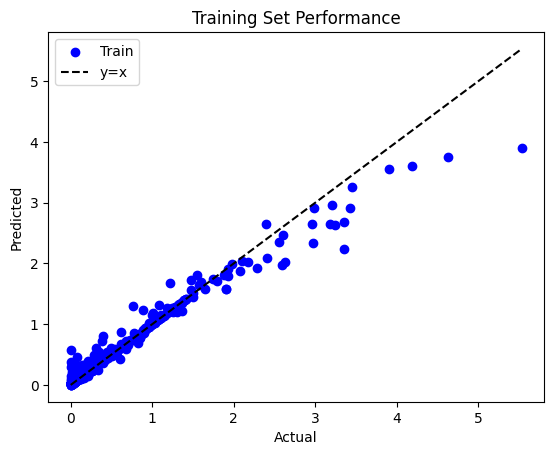

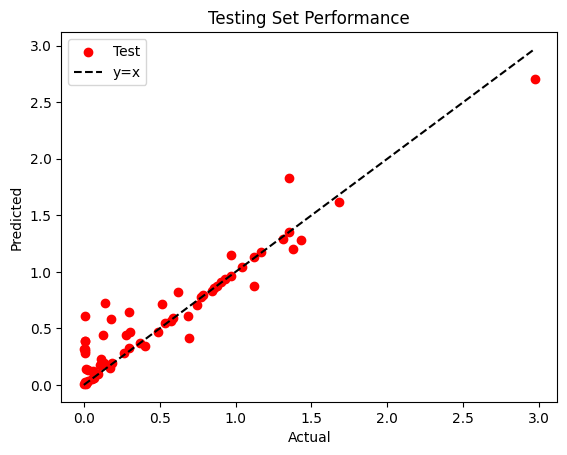

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib

# 读取CSV文件
data = pd.read_csv('C:\\Users\\sy\\Desktop\\data_rfe20c.csv')

# 数据预处理（根据实际情况进行调整）
X = data.drop(columns=['Target(uA)'])
y = data['Target(uA)']

# 数据归一化处理
scaler = MinMaxScaler()  
X_scaled = scaler.fit_transform(X)

# 将归一化后的数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=5)

# 设置参数范围
param_grid = [
    {'n_estimators': [10,28,30,35],
     'max_depth': [None,10,12,14, 16],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4],
     'max_features': ['auto', 'sqrt', 'log2']}
]

# 创建随机森林模型
random_forest_model = RandomForestRegressor()

# 使用网格搜索进行参数优化
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 计算训练集上的均方误差（MSE）
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train Mean Squared Error (MSE):", train_mse)

# 计算测试集上的均方误差（MSE）
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error (MSE):", test_mse)

# 计算训练集上的均方根误差（RMSE）
train_rmse = np.sqrt(train_mse)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

# 计算测试集上的均方根误差（RMSE）
test_rmse = np.sqrt(test_mse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)

# 计算训练集上的 R^2 分数
train_r2 = r2_score(y_train, y_train_pred)
print("Train R^2 Score:", train_r2)

# 计算测试集上的 R^2 分数
test_r2 = r2_score(y_test, y_test_pred)
print("Test R^2 Score:", test_r2)

# 保存模型为 .dat 文件
joblib.dump(best_model, 'random_forest_model.dat')

# 绘制训练集的预测图像
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set Performance")
plt.legend()
plt.show()

# 绘制测试集的预测图像
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Testing Set Performance")
plt.legend()
plt.show()


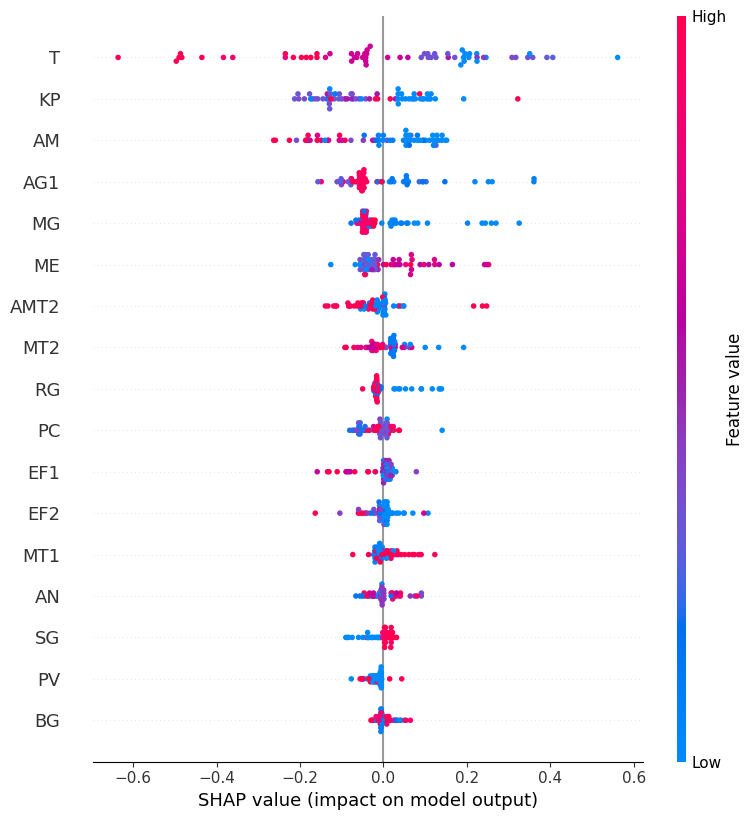

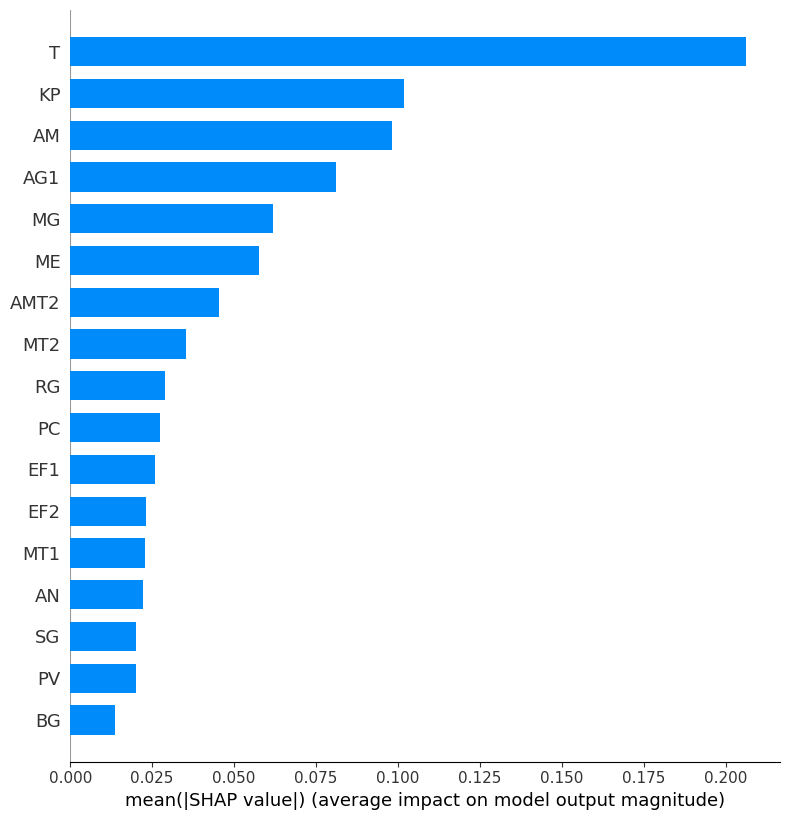

In [8]:
import shap
import joblib

# 加载保存的 XGBoost 模型
rf_model = joblib.load('random_forest_model.dat')

# 初始化 SHAP 解释器
explainer = shap.Explainer(rf_model)

# 计算 SHAP 值
shap_values = explainer.shap_values(X_test)

# 绘制 SHAP 汇总图
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# 绘制 SHAP 水平图
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)